In [1]:
from google.colab import files
uploaded = files.upload()

Saving ai_assistant_usage_student_life.csv to ai_assistant_usage_student_life.csv


SGD Linear Regression MSE: 0.6129167119336987
Decision Tree MSE: 1.09769625
Random Forest MSE: 0.562383771985


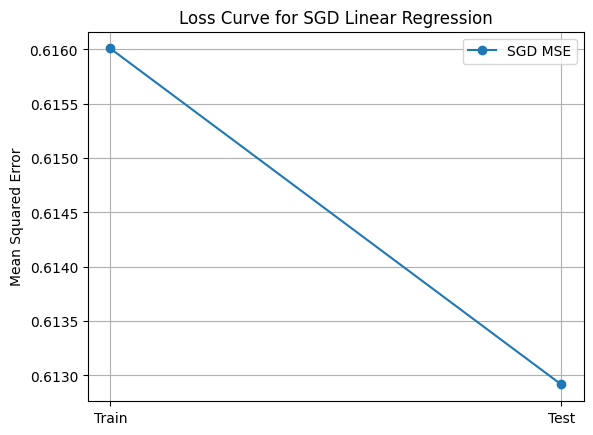

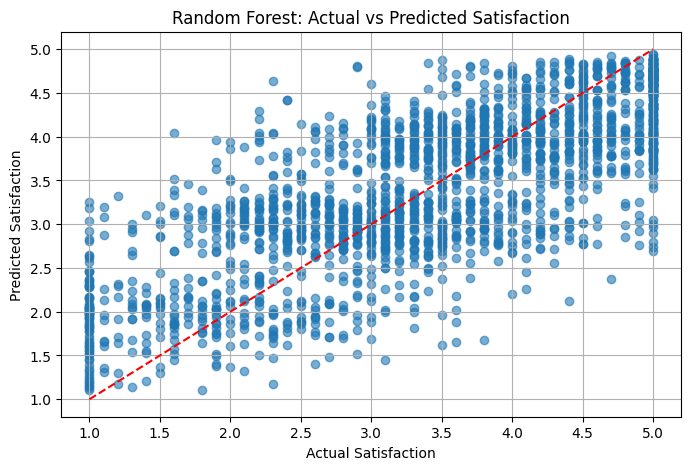

['scaler.pkl']

In [6]:
# task1_model_training.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load dataset
df = pd.read_csv("ai_assistant_usage_student_life.csv")

# Drop irrelevant columns
df = df.drop(columns=['SessionID', 'SessionDate'])

# Convert boolean to integer
df['UsedAgain'] = df['UsedAgain'].astype(int)

# Drop rows with missing target values
df = df.dropna(subset=['SatisfactionRating'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome'], drop_first=True)

# Split features and target
X = df_encoded.drop(columns=['SatisfactionRating'])
y = df_encoded['SatisfactionRating']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SGDRegressor (Linear Regression)
sgd = SGDRegressor(max_iter=1000, learning_rate='optimal')
sgd.fit(X_train_scaled, y_train)
sgd_pred_train = sgd.predict(X_train_scaled)
sgd_pred_test = sgd.predict(X_test_scaled)

# Train Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Train Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate models
sgd_mse = mean_squared_error(y_test, sgd_pred_test)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("SGD Linear Regression MSE:", sgd_mse)
print("Decision Tree MSE:", dt_mse)
print("Random Forest MSE:", rf_mse)

# Plot loss curve for SGD
train_loss = mean_squared_error(y_train, sgd_pred_train)
test_loss = mean_squared_error(y_test, sgd_pred_test)
plt.plot([0, 1], [train_loss, test_loss], marker='o', label="SGD MSE")
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for SGD Linear Regression")
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title("Random Forest: Actual vs Predicted Satisfaction")
plt.grid(True)
plt.show()

# Save best-performing model
best_model = rf if rf_mse < sgd_mse and rf_mse < dt_mse else (sgd if sgd_mse < dt_mse else dt)
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
